# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is an apple?**
1. **What is the probability that it is an orange?**

In [6]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here
p = 60/100 # 0.6
q = 40/100 # 0.4
print('Chance of getting an apple:', p)
print('Chance of getting an orange:', q)

Chance of getting an apple: 0.6
Chance of getting an orange: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [118]:
# your code here
five_apples = round(p ** 5, 4)
print('Probability that the first 5 fruits are all apples:', five_apples)

five_apples_15_oranges = (p ** 5) * (q ** 15)
print('Probability that the first 5 fruits are all apples and the next 15 \
fruits are all oranges:', five_apples_15_oranges)


Probability that the first 5 fruits are all apples: 0.0778
Probability that the first 5 fruits are all apples and the next 15 fruits are all oranges: 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [131]:
# your code here
# importing libraries
from scipy import stats
from scipy.stats import binom


# Parameters
n = 20 # number of trials (sample size)
p = 60/100 # prob of success for apples
q = 40/100 # prob of success for oranges

binomial_apple = binom(n, p)
print('Probability of getting 5 apples:', binomial_apple.pmf(5)) # prob of having 5 successes

binomial_orange = binom(n, q)
print('Probability of getting 15 oranges:', binomial_orange.pmf(15)) # prob of having 15 successes

combined = binomial_apple.pmf(5) + binomial_orange.pmf(15)
print('Probability that the sample contains 5 apples and 15 orange:', combined)

Probability of getting 5 apples: 0.0012944935222876511
Probability of getting 15 oranges: 0.0012944935222876511
Probability that the sample contains 5 apples and 15 orange: 0.0025889870445753023


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [139]:
# your code here
cdf_apples = binomial_apple.cdf(5)
print('Probability that less than 5 fruits picked are apples:', cdf_apples)

Probability that less than 5 fruits picked are apples: 0.001611524643456288


**Plot the PDF (probability distribution function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

"\nClass example:\nx = np.arange(0,11)\nfig, ax = plt.subplots(1, 1)\nax.plot(x, binom.pmf(x, n, p), 'bo')\nax.vlines(x, 0, binom.cdf(x, n, p), colors = 'b', lw = 5, alpha = 0.5)\n"

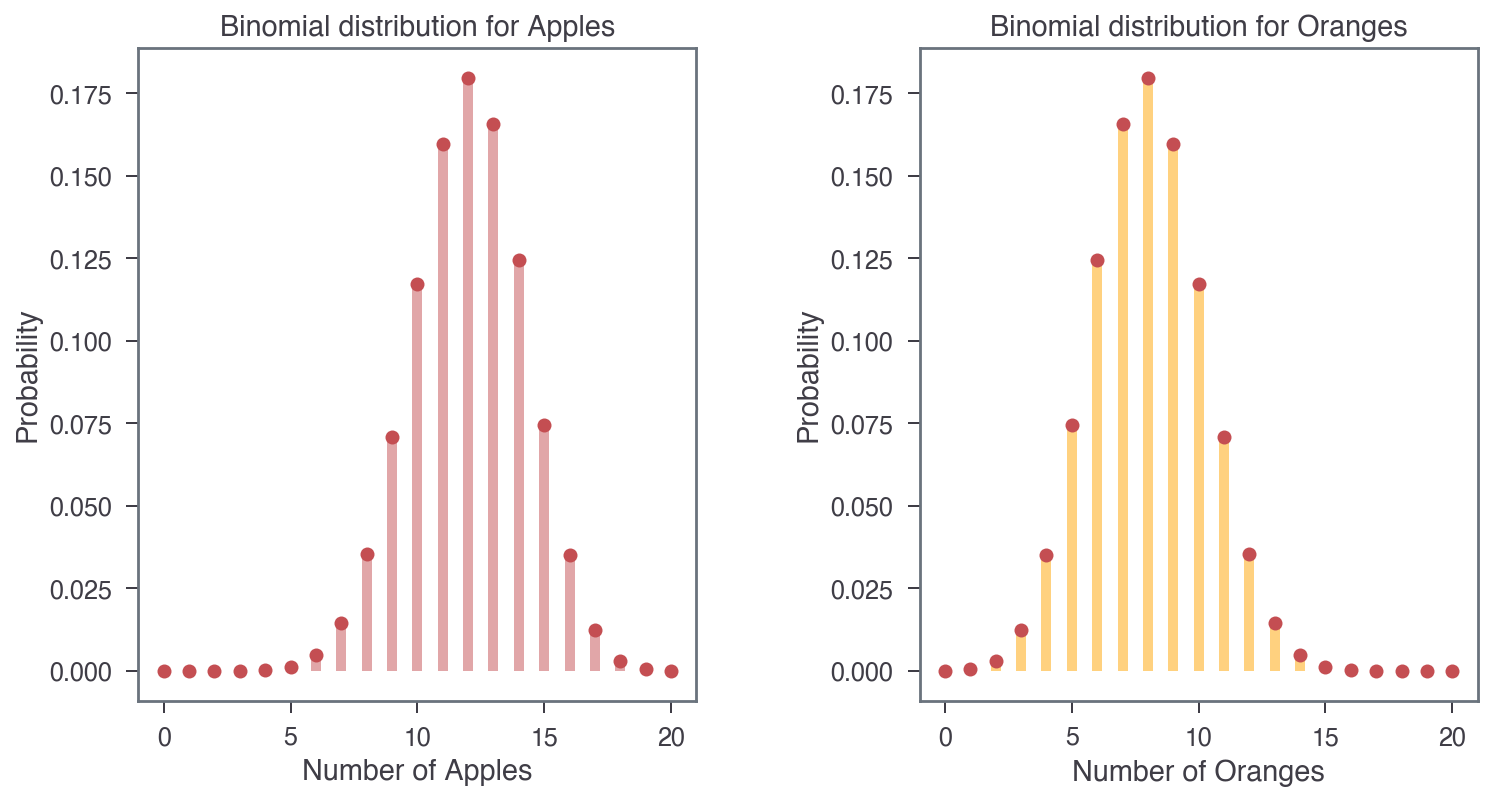

In [175]:
# your code here
# Please label the axes and give a title to the plot
import matplotlib.pyplot as plt
import numpy as np

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# Adding some space between the plots
plt.subplots_adjust(wspace = 0.4)

# Defining the 'x' axis range. Had to do n+1 so 20 would show up
x = np.arange(0, n + 1)

# Apples
ax[0].plot(x, binom.pmf(x, n, p), 'ro')
ax[0].vlines(x, 0, binom.pmf(x, n, p), colors = 'r', lw = 5, alpha = 0.5)
ax[0].set_xlabel('Number of Apples')
ax[0].set_ylabel('Probability')
ax[0].set_title('Binomial distribution for Apples')

# Oranges
ax[1].plot(x, binom.pmf(x, n, q), 'ro') # how do I make orange circles? ('oo' gives error)
ax[1].vlines(x, 0, binom.pmf(x, n, q), colors = 'orange', lw = 5, alpha = 0.5)
ax[1].set_xlabel('Number of Oranges')
ax[1].set_ylabel('Probability')
ax[1].set_title('Binomial distribution for Oranges');


'''
Class example:
x = np.arange(0,11)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.cdf(x, n, p), colors = 'b', lw = 5, alpha = 0.5)
'''

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [162]:
# your code here
import math

# Have to review this. I don't get it. Just got it from a colleague.
mu = 2.3 # mean/average
k = 5 

goals = math.exp((-mu)) * ((mu ** k) / math.factorial(k))
goals

0.05377502558194681

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

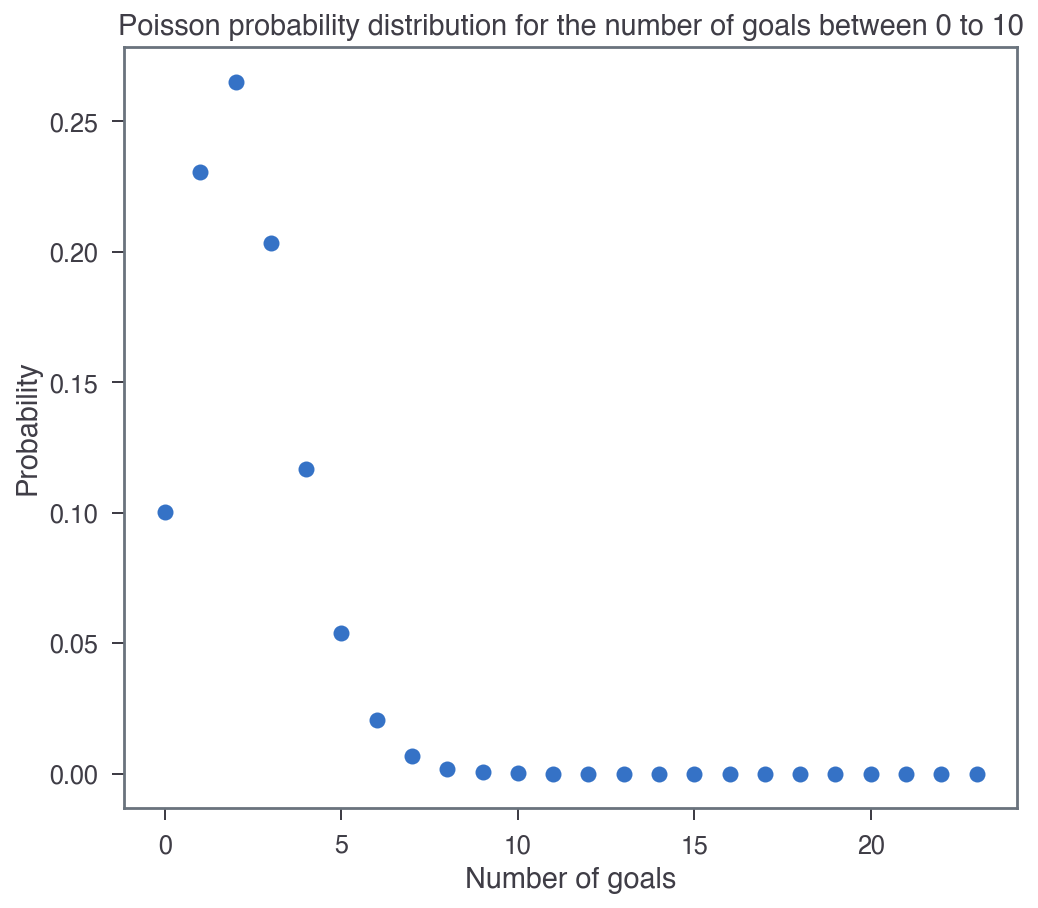

In [173]:
# your code here
# Please label the axes and give a title to the plot 
from scipy.stats import poisson

# All from class script. Just changed the values and added the labels
mu = 2.3
mean, var, skew, kurt = poisson.stats(mu, moments = 'mvsk')

# Range - we want from 0 to 10
x = np.arange(poisson.ppf(0.00001, 0), poisson.ppf(0.9999, 10))

# Plot
plt.plot(x, poisson.pmf(x, mu), 'bo', ms = 8, label = 'poisson pmf')

# Labels and title
plt.xlabel('Number of goals')
plt.ylabel('Probability')
plt.title('Poisson probability distribution for the number of goals between 0 to 10');